In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Xtrain=[]
Xtest=[]
ytrain=[]
ytest=[]
for i in range(0,123):
    d=str(i+1)+'/'
    imglist=os.listdir(d)
    l=len(imglist)
    for j in range(l):
        im=cv2.imread(d+imglist[j],)
        if j==0 or j==l-1:
            Xtest.append(im)
            ytest.append(i)
        else:
            Xtrain.append(im)
            ytrain.append(i)

Xtrain=np.array(Xtrain)
Xtest=np.array(Xtest)
ytrain=np.array(ytrain)
ytest=np.array(ytest)

Xtrain=Xtrain/255
Xtest=Xtest/255

Xtrain.shape

(4305, 100, 100, 3)

In [3]:
Xtest.shape

(246, 100, 100, 3)

In [4]:
ytrain.shape

(4305,)

In [5]:
ytest.shape

(246,)

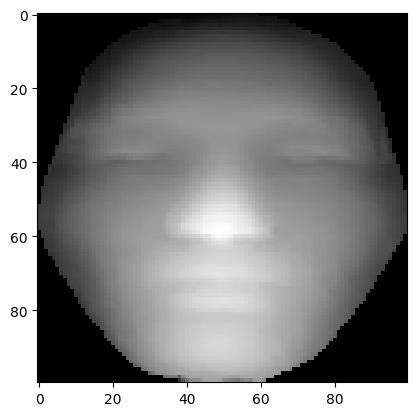

In [6]:
plt.imshow(Xtrain[4304])

In [7]:
ytrain[4304]

122

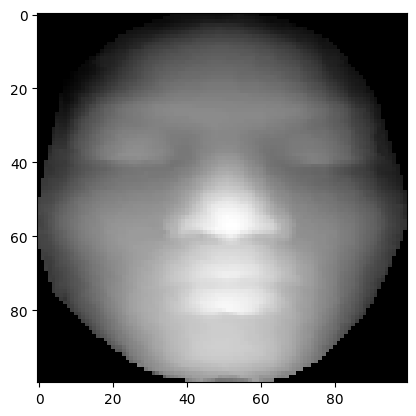

In [8]:
plt.imshow(Xtrain[245])

In [9]:
ytest[245]

122

In [11]:
import tensorflow as tf
from tensorflow.keras import Sequential
from sklearn.metrics import confusion_matrix,classification_report
from tensorflow.keras.layers import Input,Dense,Conv2D,Flatten,MaxPooling2D
from tensorflow.keras.applications import InceptionV3

In [37]:
base_model=InceptionV3(weights='imagenet',include_top=False,input_tensor=Input(shape=(100,100,3)))

In [38]:
for layer in base_model.layers[:-25]:
    layer.trainable=False

In [39]:
model=Sequential()

model.add(base_model)

model.add(Flatten())

model.add(Dense(250,activation='relu'))

model.add(Dense(123,activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 1, 1, 2048)        21802784  
                                                                 
 flatten_8 (Flatten)         (None, 2048)              0         
                                                                 
 dense_16 (Dense)            (None, 250)               512250    
                                                                 
 dense_17 (Dense)            (None, 123)               30873     
                                                                 
Total params: 22345907 (85.24 MB)
Trainable params: 3363603 (12.83 MB)
Non-trainable params: 18982304 (72.41 MB)
_________________________________________________________________


In [40]:
model.fit(Xtrain,ytrain,epochs=8,validation_data=(Xtest,ytest))

Epoch 1/8
135/135 [==============================] - 93s 613ms/step - loss: 3.6629 - accuracy: 0.2351 - val_loss: 2.2378 - val_accuracy: 0.4309
Epoch 2/8
135/135 [==============================] - 79s 585ms/step - loss: 1.8026 - accuracy: 0.5621 - val_loss: 1.1564 - val_accuracy: 0.7520
Epoch 3/8
135/135 [==============================] - 78s 578ms/step - loss: 0.9123 - accuracy: 0.7742 - val_loss: 0.9750 - val_accuracy: 0.7764
Epoch 4/8
135/135 [==============================] - 78s 579ms/step - loss: 0.3621 - accuracy: 0.9238 - val_loss: 0.8097 - val_accuracy: 0.8049
Epoch 5/8
135/135 [==============================] - 79s 587ms/step - loss: 0.1675 - accuracy: 0.9661 - val_loss: 0.7518 - val_accuracy: 0.8293
Epoch 6/8
135/135 [==============================] - 78s 578ms/step - loss: 0.0749 - accuracy: 0.9884 - val_loss: 0.6727 - val_accuracy: 0.8618
Epoch 7/8
135/135 [==============================] - 78s 580ms/step - loss: 0.0303 - accuracy: 0.9967 - val_loss: 0.6381 - val_accuracy:

In [41]:
yprob=model.predict(Xtest)
yprob.shape

8/8 [==============================] - 7s 467ms/step


(246, 123)

In [42]:
ypred=yprob.argmax(axis=1)
ypred.shape

(246,)

In [43]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       0.67      1.00      0.80         2
          11       1.00      0.50      0.67         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         2
          16       1.00      0.50      0.67         2
          17       1.00    

[]

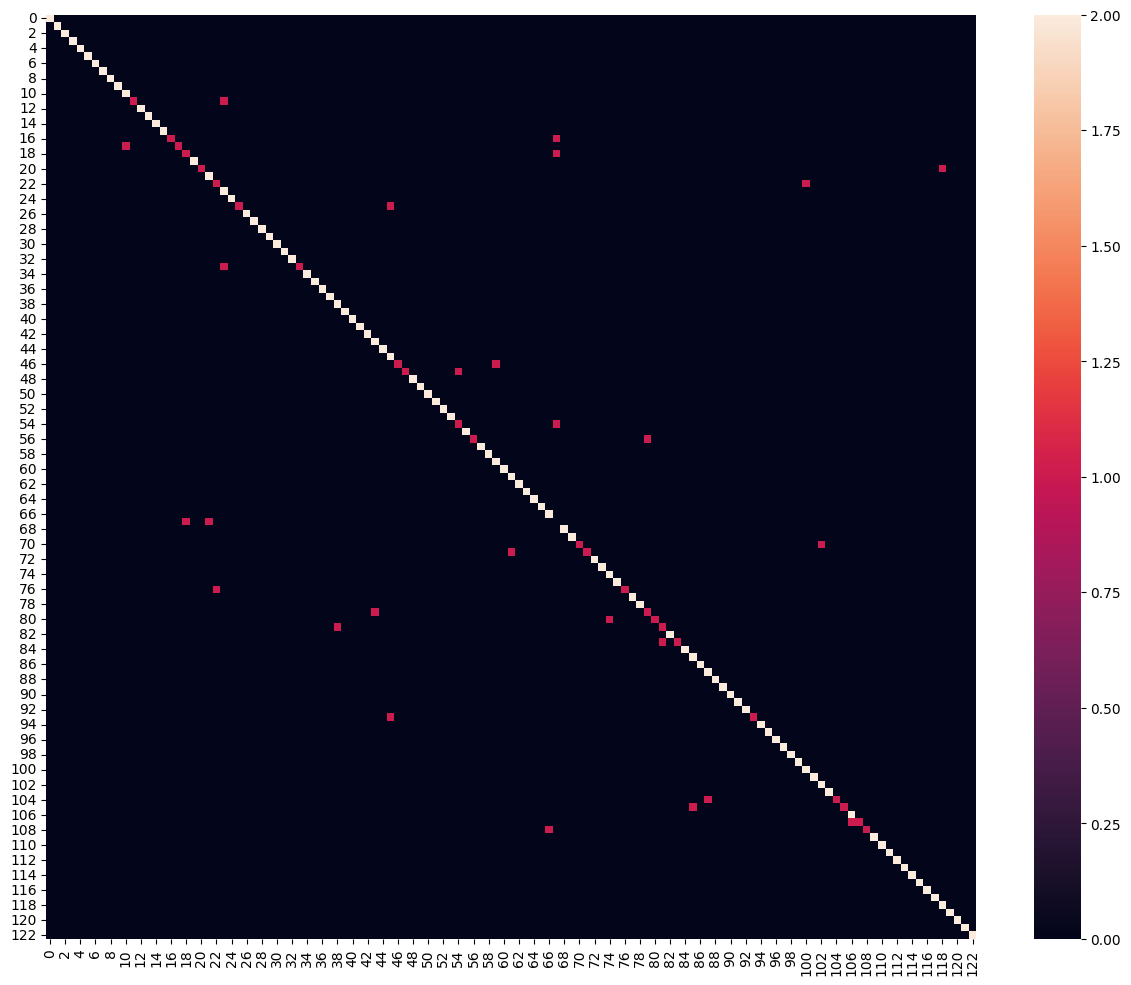

In [44]:
conm=confusion_matrix(ytest,ypred)
plt.figure(figsize=(15,12))
sns.heatmap(data=conm)
plt.plot()